In [1]:
#Importing the ibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [4]:
#Concatenate the dataframes
X = pd.concat([X, geography, gender], axis=1)

In [5]:
#Drop unnecessary columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [6]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
#Initialising the ANN
classifier = Sequential()

In [10]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [11]:
#Adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [12]:
#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [13]:
#Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.8976 - accuracy: 0.4409 - val_loss: 0.6407 - val_accuracy: 0.6622
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5610 - accuracy: 0.7384 - val_loss: 0.5161 - val_accuracy: 0.7846
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4955 - accuracy: 0.7942 - val_loss: 0.4891 - val_accuracy: 0.7940
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4769 - accuracy: 0.7981 - val_loss: 0.4762 - val_accuracy: 0.7952
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4657 - accuracy: 0.7994 - val_loss: 0.4667 - val_accuracy: 0.7963
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.8016 - val_loss: 0.4588 - val_accuracy: 0.8027
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.8050 - val_loss: 0.4523 - val_accuracy: 0.8046

In [16]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


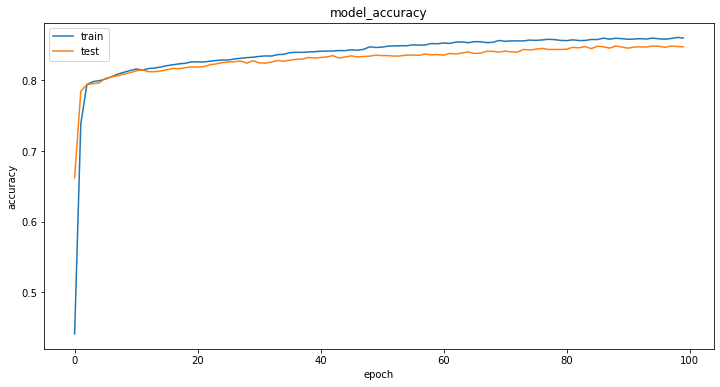

In [17]:
#Summarize history for accuracy
from matplotlib.pyplot import figure
figure(figsize=(12, 6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
#Making predictions and evaluating the model
y_pred = classifier.predict(X_test)

In [20]:
y_pred = (y_pred > 0.5)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [25]:
print(cm)
print(score)

[[1530   65]
 [ 206  199]]
0.8645
